In [1]:
import torch

In [2]:
a = 1e-12

In [3]:
type(a)

float

In [5]:
torch.tensor(a)

tensor(1.0000e-12)

In [20]:
a = torch.rand(2,9,786).float()

In [10]:
a.shape

torch.Size([2, 9, 786])

In [18]:
from torch import nn
ln = nn.LayerNorm(786, eps=1e-12).double()

In [19]:
a1 = ln(a)

In [12]:
a1.shape

torch.Size([2, 9, 786])

In [6]:
import torch
a = torch.tensor([1,1,0])
b = torch.tensor([0.5,0,1])

In [8]:
torch.max(b-a, torch.tensor ([0.0]))

tensor([0., 0., 1.])

In [5]:
b-a

tensor([-1, -1,  1])

In [9]:
b = torch.full([2, 5], 1.5)

In [10]:
b

tensor([[1.5000, 1.5000, 1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000, 1.5000, 1.5000]])

In [2]:
from datasets import load_dataset

train_dataset = load_dataset("philipphager/baidu-ultr_baidu-mlm-ctr",name="clicks",
                            split="train", # ["train", "test"]
                            cache_dir="~/.cache/huggingface",
                            )

/home/ggbhatt/anaconda3/envs/rank1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ggbhatt/anaconda3/envs/rank1/lib/python3.9/site-packages/datasets/load.py:1486: FutureWarning: The repository for philipphager/baidu-ultr_baidu-mlm-ctr contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/philipphager/baidu-ultr_baidu-mlm-ctr
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [3]:
train_dataset

Dataset({
    features: ['query_id', 'query_md5', 'query', 'query_length', 'n', 'url_md5', 'text_md5', 'title', 'abstract', 'query_document_embedding', 'click', 'position', 'media_type', 'displayed_time', 'serp_height', 'slipoff_count_after_click', 'bm25', 'bm25_title', 'bm25_abstract', 'tf_idf', 'tf', 'idf', 'ql_jelinek_mercer_short', 'ql_jelinek_mercer_long', 'ql_dirichlet', 'document_length', 'title_length', 'abstract_length'],
    num_rows: 1779017
})

In [5]:
train_dataset['bm25'][0]

[37.58316421508789,
 36.20572280883789,
 56.07870864868164,
 70.85820007324219,
 52.38069152832031,
 47.444210052490234,
 51.77769088745117,
 41.325138092041016]

In [6]:
train_dataset['tf_idf'][0]

[25.439960479736328,
 20.177860260009766,
 41.639854431152344,
 35.50246810913086,
 38.605186462402344,
 25.439960479736328,
 39.025325775146484,
 22.449565887451172]

In [1]:
import torch
from src.bert import BertModel, BertReward
from transformers.models.bert.configuration_bert import BertConfig

config = BertConfig()

config.vocab = 100
config.num_labels = 1 # regression output
config.problem_type = "classification"
config.max_position_embeddings = 50

# if args.use_doc_feat:
# 	# self.config.doc_feat_len=0
# 	self.config.hidden_size+=12

reward_model = BertReward(config)

mname = "dfeat_un"
checkpoint = torch.load('../outputs/'+mname+'/checkpoint35.pth', map_location='cpu')

from datasets import load_dataset

train_dataset = load_dataset("philipphager/baidu-ultr_baidu-mlm-ctr",name="clicks",
                            split="train", # ["train", "test"]
                            cache_dir="~/.cache/huggingface",
                            )

/home/ggbhatt/anaconda3/envs/rank1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Jax plugin configuration error: Exception when calling jax_plugins.xla_cuda12.initialize()
Traceback (most recent call last):
  File "/home/ggbhatt/anaconda3/envs/rank1/lib/python3.9/site-packages/jax/_src/xla_bridge.py", line 430, in discover_pjrt_plugins
    plugin_module.initialize()
  File "/home/ggbhatt/anaconda3/envs/rank1/lib/python3.9/site-packages/jax_plugins/xla_cuda12/__init__.py", line 78, in initialize
    options = xla_client.generate_pjrt_gpu_plugin_options()
AttributeError: module 'jaxlib.xla_client' has no attribute 'generate_pjrt_gpu_plugin_options'
/home/ggbhatt/anaconda3/envs/rank1/lib/python3.9/site-packages/datasets/load.py:1486: FutureWarning: The repository for philipphager/baidu-ultr_baidu-mlm-ctr 

In [3]:
from src.data import collate_fn
from torch.utils.data import DataLoader

train_dataset = load_dataset("philipphager/baidu-ultr_baidu-mlm-ctr",name="clicks",
                        split="train", # ["train", "test"]
                        cache_dir="~/.cache/huggingface",
                        )

test_dataset = load_dataset("philipphager/baidu-ultr_baidu-mlm-ctr",name="clicks",
                        split="test", # ["train", "test"]
                        cache_dir="~/.cache/huggingface",
                        )

train_dataloader = DataLoader(train_dataset, collate_fn=collate_fn, batch_size=64,
                                num_workers=2, pin_memory=True)
    
test_dataloader = DataLoader(test_dataset, collate_fn=collate_fn, batch_size=64,
                                num_workers=2)

In [4]:
for batch in iter(train_dataloader):
    feat = batch['query_document_embedding']
    pos_idx = batch['position']
    out = reward_model(inputs_embeds=feat, position_ids=pos_idx)
    bre

/local/home/ggbhatt/workspace/cf_ranking/cf_rank/src/data.py:71: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1702400412039/work/torch/csrc/utils/tensor_new.cpp:261.)
  column: torch.tensor(features, dtype=COLUMNS[column]["dtype"])
/local/home/ggbhatt/workspace/cf_ranking/cf_rank/src/data.py:71: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1702400412039/work/torch/csrc/utils/tensor_new.cpp:261.)
  column: torch.tensor(features, dtype=COLUMNS[column]["dtype"])


: 

In [3]:
27796/8

3474.5

In [7]:
a['']

dict_keys(['n', 'query_document_embedding', 'click', 'position', 'bm25', 'bm25_title', 'bm25_abstract', 'tf_idf', 'tf', 'idf', 'ql_jelinek_mercer_short', 'ql_jelinek_mercer_long', 'ql_dirichlet', 'document_length', 'title_length', 'abstract_length', 'mask'])

In [2]:
import torch
import os

In [4]:
torch.save(torch.tensor([1,2,3]),os.path.join('__pycache__','def'))

In [3]:
#from tsnecuda import TSNE
import torch
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE()

#a = torch.load(saved_path+model+'/saved_cls')
#b = torch.load(saved_path+model+'/saved_label')

In [32]:
import torch

def plot(model, dim=780, n_viz=1, title='GT_labels',saved_path='../cf_ranking/outputs/'):
    a = torch.load(saved_path+model+'/saved_cls')
    b = torch.load(saved_path+model+'/saved_label')
    c = torch.load('../cf_ranking/outputs/soft_0.8_0.05/saved_prob')

    a1 = tsne.fit_transform(a[0:n_viz].view(-1,dim))
    #plt.figure(figsize=(8, 6))

    fig, ax = plt.subplots(1, 3, figsize=(24,8), dpi=220)
    #fig.suptitle('Common Title for All Subplots', fontsize=30)
    fig.text(0.04, 0.5, 'sr_df_per0.5\nval_acc: '+str(76.3)+'\n KL_div: '+str(0.34), va='center', fontsize=16, fontweight='bold')
    plt.subplots_adjust(wspace=0.05, hspace=0.1)

    scatter = []
    flag = 0

    for i in ax[:-1]:
        scatter.append(i.scatter(a1[:, 0], a1[:, 1], c=b[0:n_viz].view(-1), cmap='jet', s=50, alpha=0.7))

    # Add a colorbar
        #if flag == 2:
        plt.colorbar(scatter[-1], shrink=0.8)
        # flag+=1

        i.set_title("t-SNE : "+title)
        #i.xlabel("t-SNE Component 1")
        #i.ylabel("t-SNE Component 2")
        i.plot()
        #i.set_aspect('equal')

    ax[2].hist2d(range(len(c[0:n_viz].view(-1))), c[0:n_viz].view(-1), bins=20)
    ax[2].set_title("Score distibution")
    ax[2].plot()
    #ax[2].set_aspect('equal')
    #plt.tight_layout()

    plt.savefig('test.jpg', bbox_inches='tight', pad_inches=0.1)

In [23]:
import torch
import torch.nn.functional as F
b = torch.load('../cf_ranking/outputs/soft_0.8_0.05/saved_prob')

/tmp/ipykernel_39484/1707848130.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  b = torch.load('../cf_ranking/outputs/soft_0.8_0.05/saved_prob')


In [34]:
def distance_between_probabilities(prob1, prob2, distance_type='kl'):
    
    if distance_type == 'kl':
        # Ensure non-zero values to avoid log(0) in KL divergence
        prob1 = prob1 + 1e-8
        prob2 = prob2 + 1e-8
        kl_div = F.kl_div(prob1.log(), prob2, reduction='batchmean')  # KL Divergence
        return kl_div
    
    elif distance_type == 'js':
        # Jensen-Shannon Divergence (symmetrized version of KL)
        prob1 = prob1 + 1e-8
        prob2 = prob2 + 1e-8
        m = 0.5 * (prob1 + prob2)
        js_div = 0.5 * (F.kl_div(prob1.log(), m, reduction='batchmean') + F.kl_div(prob2.log(), m, reduction='batchmean'))
        return js_div
    
    elif distance_type == 'l2':
        # L2 Distance (Euclidean distance)
        l2_dist = torch.norm(prob1 - prob2, p=2)
        return l2_dist
    
    elif distance_type == 'l1':
        # L1 Distance (Manhattan distance)
        l1_dist = torch.norm(prob1 - prob2, p=1)
        return l1_dist

In [36]:
distance_between_probabilities(b,torch.rand_like(b))

tensor(332.0481)

/tmp/ipykernel_39484/4020974925.py:2: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


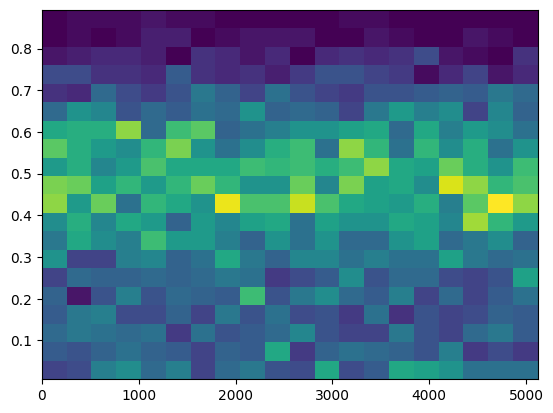

In [10]:
from scipy.interpolate import make_interp_spline
from scipy.ndimage.filters import gaussian_filter1d
x,y = range(1024*5),b[0:5].view(-1)
#spl = make_interp_spline(x,y)
#y = gaussian_filter1d(y, sigma=5)
#plt.plot(x,y, linestyle='-')
plt.hist2d(x,y,bins=20);
#plt.bar(x,y)

In [41]:
y[0:20]

tensor([0.0428, 0.5399, 0.4271, 0.5179, 0.7636, 0.4575, 0.5000, 0.3253, 0.0695,
        0.4671, 0.5682, 0.4858, 0.4338, 0.4523, 0.6525, 0.0716, 0.5397, 0.6152,
        0.5102, 0.4770])

/tmp/ipykernel_4132/1857008645.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  a = torch.load(saved_path+model+'/saved_cls')


/tmp/ipykernel_4132/1857008645.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  b = torch.load(saved_path+model+'/saved_label')
/tmp/ipykernel_4132/1857008645.py:6: Futur

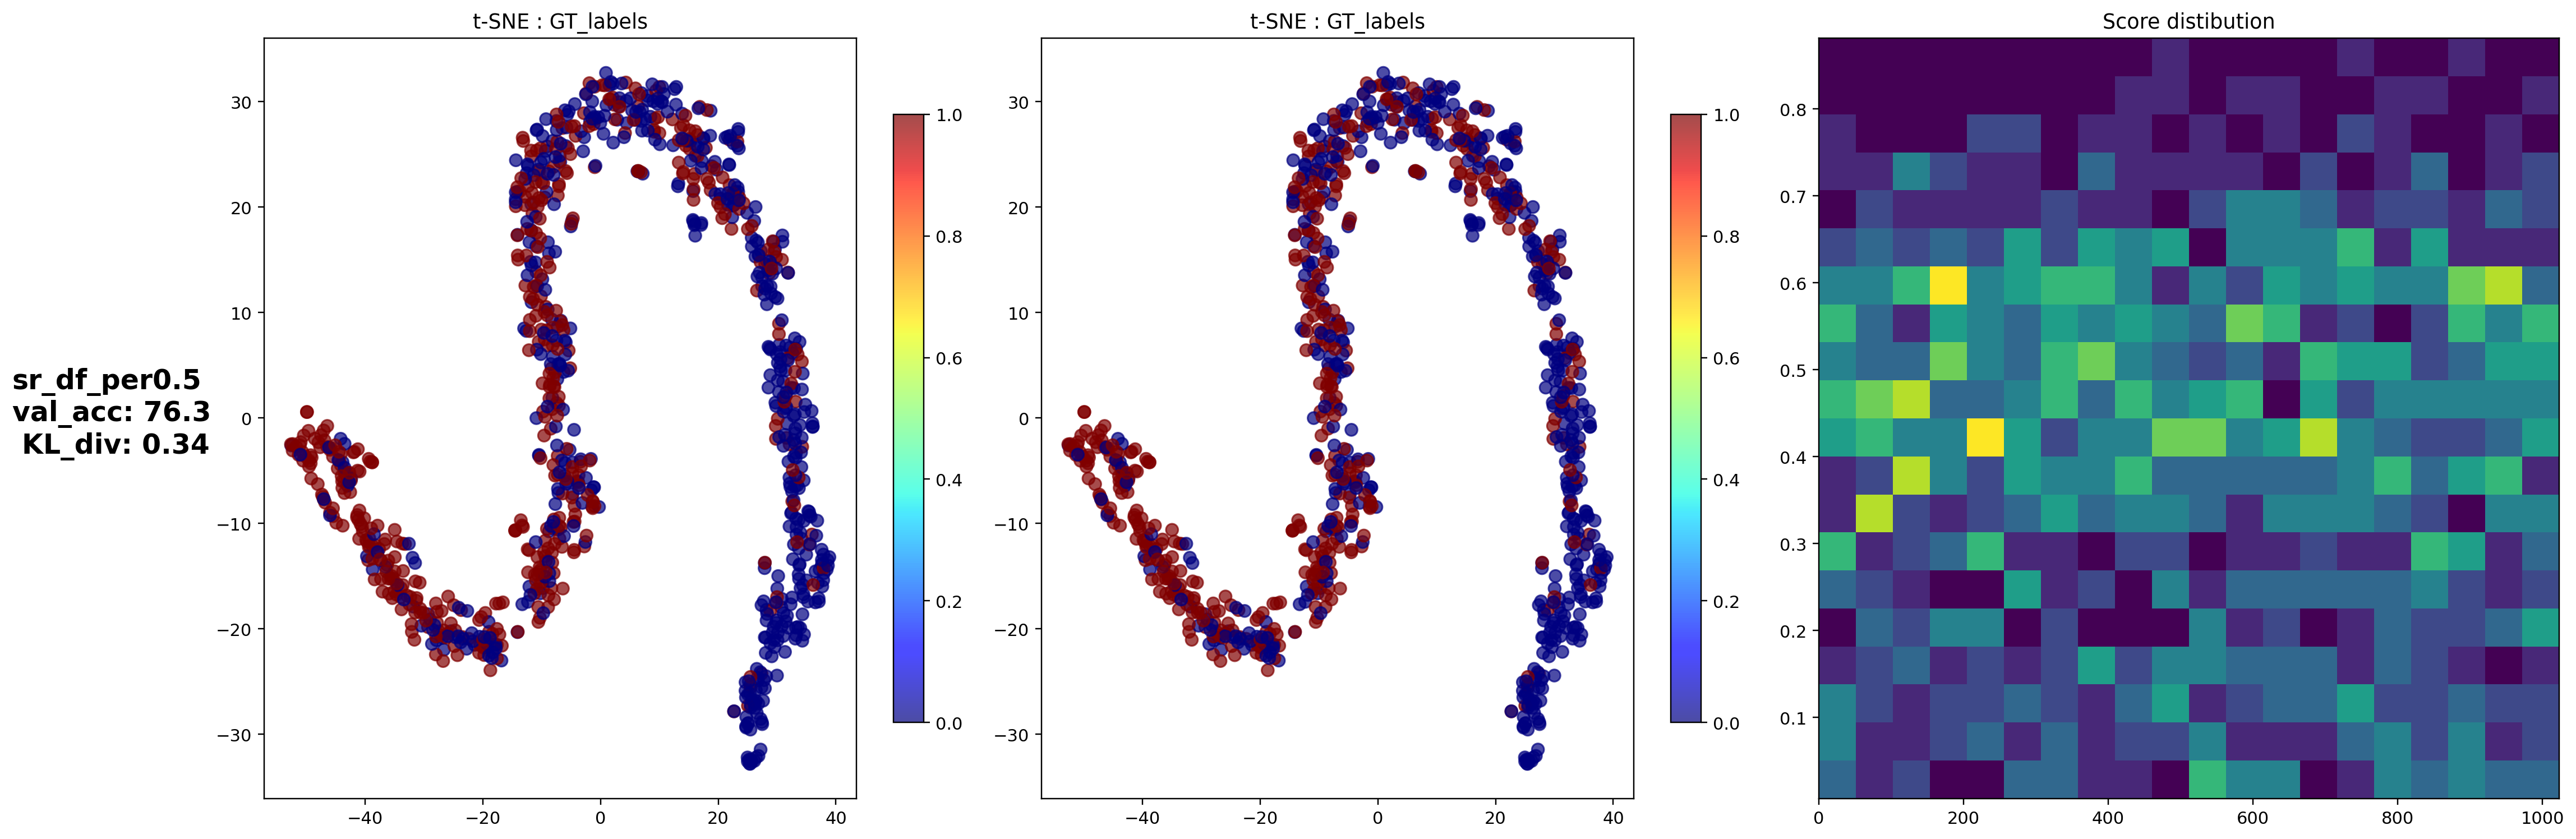

In [33]:
model='sr_df'
plot(model,n_viz=1)

In [ ]:
model='ep40_drp15_wd4'
plot(model, dim=768, n_viz=50, saved_path='../outputs/')

In [7]:
model='sr_nodf'
#plot(model, dim=768)

/tmp/ipykernel_92741/1131402897.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  a = torch.load(saved_path+model+'/saved_cls')
/tmp/ipykernel_92741/1131402897.py:5: Futur

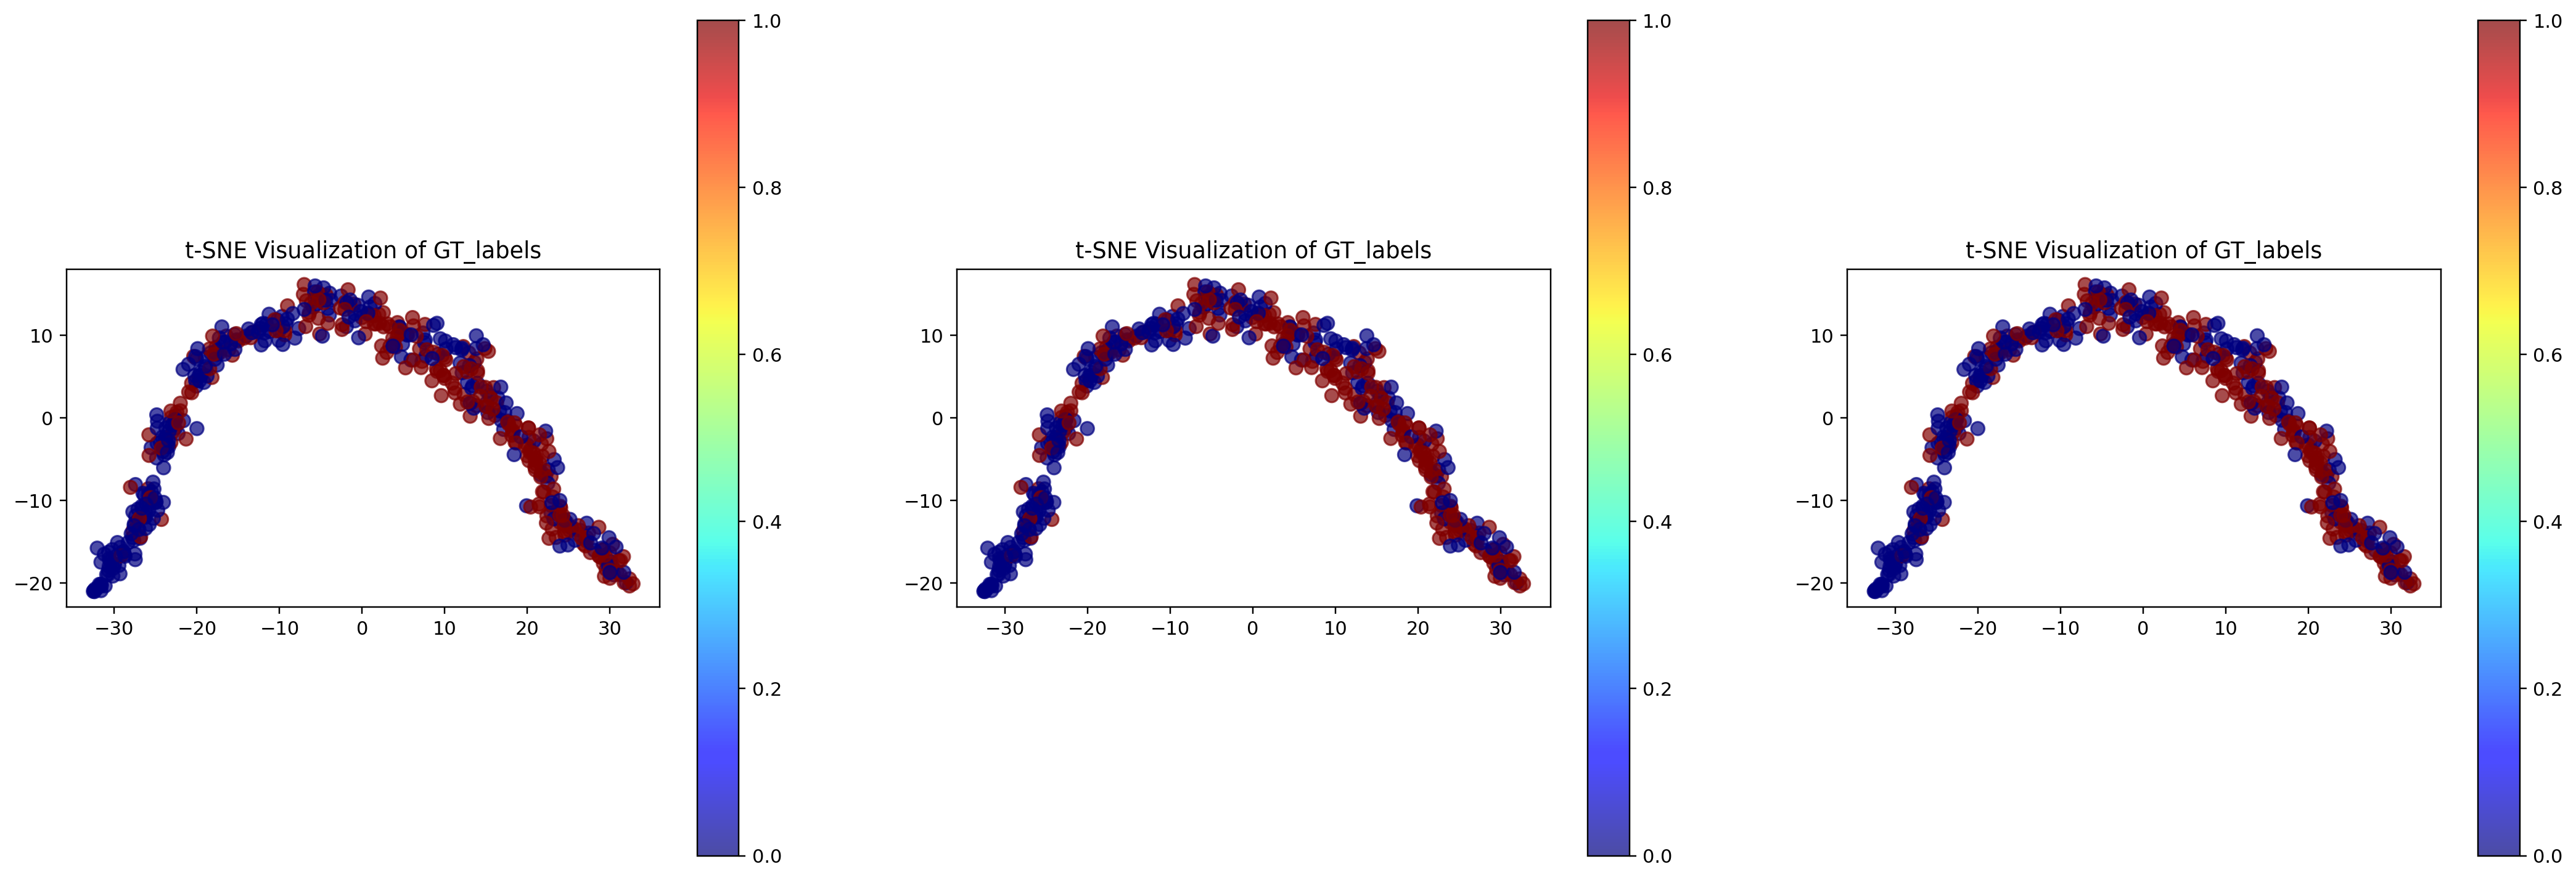

In [14]:
#fig, ax = plt.subplots(1, 3, figsize=(14,6), dpi=220)

plot(model=model,dim=768)

In [5]:
ax[0].scatter

<bound method Axes.scatter of <Axes: >>

In [17]:
a = torch.load('../cf_ranking/outputs/'+model+'/saved_cls')
b = torch.load('../cf_ranking/outputs/'+model+'/saved_label')

/tmp/ipykernel_109499/2676748144.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  a = torch.load('../cf_ranking/outputs/'+model+'/saved_cls')
/tmp/ipykernel_109499/267674

In [18]:
a.shape

torch.Size([290, 512, 780])

/tmp/ipykernel_109499/2011973477.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  a = torch.load('../cf_ranking/outputs/'+model+'/saved_cls')
/tmp/ipykernel_109499/201197

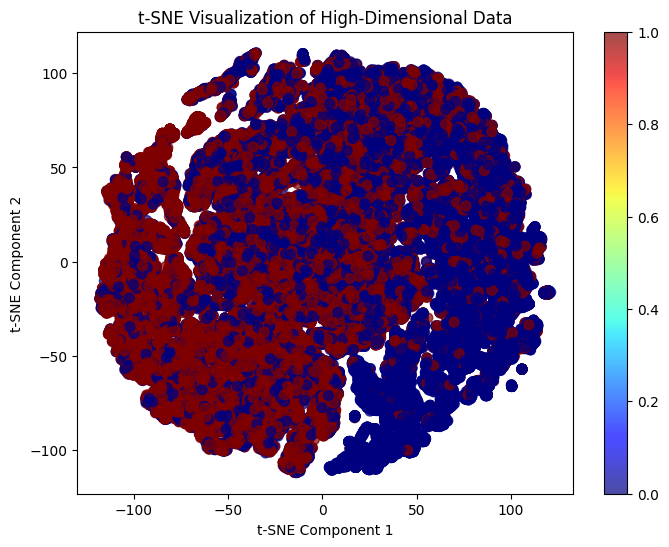

In [21]:
model='sr_df'
plot(model,n_viz=200)

In [4]:
from datasets import load_dataset
from torch.utils.data import DataLoader
#from bbm.src.model import CrossEncoder
from src.data import collate_fn
import numpy as np
import torch
import pandas as pd
from collections import defaultdict
import tqdm


In [8]:
batch_size = 8
dataset = load_dataset(
    "philipphager/baidu-ultr_uva-mlm-ctr",
    name="clicks",
    split="test",
    trust_remote_code=True,
)

click_loader = DataLoader(
    dataset,
    batch_size=batch_size,
    collate_fn=collate_fn,
    num_workers=0,
)

# click_loader1 = DataLoader(
#     dataset,
#     batch_size=batch_size,
#     collate_fn=collate_click_fn,
# )

# model = CrossEncoder.from_pretrained("philipphager/baidu-ultr_uva-bert_naive-pointwise")
# model1 = CrossEncoder.from_pretrained("philipphager/baidu-ultr_uva-bert_dla")
# model2 = CrossEncoder.from_pretrained("philipphager/baidu-ultr_uva-bert_ips-listwise")
# model4 = CrossEncoder.from_pretrained("philipphager/baidu-ultr_uva-bert_twotower")

In [11]:
len(click_loader)/8

9280.25

In [10]:
batch1 = next(iter(click_loader))

# new_batch = {'tokens':batch1['tokens'].reshape(batch_size*9,128),
#              'attention_mask':batch1['attention_mask'].reshape(batch_size*9,128),
#              'token_types':batch1['token_types'].reshape(batch_size*9,128)}
# out_c = model(new_batch)
# out_c1 = model1(new_batch)
# out_c2 = model(new_batch)

# Use model only for relevance prediction, e.g., for evaluation:
# out_r = model.predict_relevance(batch2)

In [21]:
a1 = torch.tensor(batch1['click'])
(0.8 + a1.sum(dim=1) * 0.05)*torch.clamp(a1.sum(dim=1), max=1.0)

tensor([0.9000, 0.8500, 0.8500, 0.0000, 0.0000, 0.0000, 0.8500, 0.9000])

In [20]:
batch1['click']

array([[0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0]])

In [31]:
pred = np.array(out_c.click)
avg_click = pred.reshape(16,9)

In [34]:
batch1['click_mod'] = avg_click

In [56]:
batch_out = {}
for i,j in batch1.items():
    batch_out[i] = j.tolist()

In [57]:
df = pd.DataFrame(batch_out)
df.to_feather('out.feather')

In [12]:
batch_out = defaultdict(lambda: [])
for idx, batch in tqdm.tqdm(enumerate(click_loader)):
    #if idx < 5000:
    #    continue
    #print(idx)
    row,col = batch['tokens'].shape[0], batch['tokens'].shape[1] 
    new_batch = {'tokens':batch['tokens'].reshape(row*col,128),
             'attention_mask':batch['attention_mask'].reshape(row*col,128),
             'token_types':batch['token_types'].reshape(row*col,128)}
    out_c = model(new_batch)
    pred = np.array(out_c.click).reshape(row,col)
    batch['click_mod'] = pred

    for i,j in batch.items():
        batch_out[i].extend(j.tolist())
        #batch_out['click_mod'].extend(pred.tolist())
    #if idx > 10:
    #    break
df = pd.DataFrame(batch_out)
df.to_feather('out.feather')

0it [00:00, ?it/s]

215it [02:18,  1.85it/s]

In [1]:
import pandas as pd

In [20]:
a = pd.read_feather('../../data/naive-pointwise_train1.feather')

In [21]:
a.keys()

Index(['tokens', 'token_types', 'attention_mask', 'n',
       'query_document_embedding', 'click', 'position', 'bm25', 'bm25_title',
       'bm25_abstract', 'tf_idf', 'tf', 'idf', 'ql_jelinek_mercer_short',
       'ql_jelinek_mercer_long', 'ql_dirichlet', 'document_length',
       'title_length', 'abstract_length', 'mask', 'click_mod'],
      dtype='object')

In [23]:
a['click'][85000]

array([1, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
27796*8

222368

In [58]:
pos = torch.tensor(list(range(10))).float()
delta = 1.0
weight = torch.tensor(10*[delta])
torch.multinomial(pos, 10, replacement=False)

tensor([8, 9, 7, 6, 5, 4, 2, 3, 1, 0])

In [71]:
int(len(pos)*0.6)

6

In [11]:
def sample_without_replacement_with_prob(delta, pos):
    weights = torch.ones_like(pos)
    remaining_idx = []

    #print('pos', pos)

    if delta*len(pos)<1:
        idx = torch.multinomial(pos, len(pos), replacement=False)
        return pos[idx]
    
    delta_sample_idx = torch.multinomial(pos,int(delta*len(pos)), replacement=False)
    #print ('retaining', pos[delta_sample_idx])
    weights[delta_sample_idx] = 0
    #remaining_idx = len(pos) - int(delta*len(pos))

    for i,j in enumerate(pos):
        if j not in pos[delta_sample_idx]:
            remaining_idx.append(i)

    #print ('perturbing', remaining_idx)

    d_pos = pos.clone()

    for i in remaining_idx:
        # Normalize weights to ensure they sum to 1
        normalized_weights = weights / weights.sum()

        # Sample one index based on normalized weights
        if weights.sum() == 0:
            return d_pos
        
        sampled_index = torch.multinomial(normalized_weights, 1).item()

        print (i, sampled_index, normalized_weights)

        d_pos[sampled_index] = pos[i]

        # Set the weight of the sampled index to 0 for the next iteration
        weights[sampled_index] = 0

    return d_pos

def sample_swap(pos, click=None, fn='rand'):
    
    def swap(pos, idx):    
        temp = pos[idx].clone()
        pos[idx] = pos[-1]
        pos[-1] = temp
        return pos
    
    if fn == 'rand':
        return swap(pos, idx=0)
    if click.sum()>0:
        indices = (click == 1).nonzero()
        if fn=='first_click_bot':
            idx = indices[0].item()
        elif fn=='first_click_top':
            idx = indices[-1].item()
        return swap(pos, idx)
        
    return pos


In [280]:
pos = torch.tensor([2,4,5,7,8,91,21,1]).float()
delta = 1.0
sample_without_replacement_with_prob(delta=delta,pos=pos)

pos tensor([ 2.,  4.,  5.,  7.,  8., 91., 21.,  1.])
retaining tensor([ 1.,  2., 91., 21.,  8.,  7.,  5.,  4.])
perturbing []


tensor([ 2.,  4.,  5.,  7.,  8., 91., 21.,  1.])

In [10]:
import torch
pos = torch.tensor([2,4,5,7,8,91,21,1]).float()
sample_swap(pos)

tensor([ 1.,  4.,  5.,  7.,  8., 91., 21.,  2.])

In [1]:
from PIL import Image

def merge_images(image_paths, output_path, direction="horizontal"):

    images = [Image.open(path) for path in image_paths]
    widths, heights = zip(*(i.size for i in images))

    if direction == "horizontal":
        total_width = sum(widths)
        max_height = max(heights)
        new_image = Image.new('RGB', (total_width, max_height))

        x_offset = 0
        for image in images:
            new_image.paste(image, (x_offset, 0))
            x_offset += image.size[0]

    elif direction == "vertical":
        max_width = max(widths)
        total_height = sum(heights)
        new_image = Image.new('RGB', (max_width, total_height))

        y_offset = 0
        for image in images:
            new_image.paste(image, (0, y_offset))
            y_offset += image.size[1]

    else:
        raise ValueError("Invalid direction. Choose 'horizontal' or 'vertical'")

    new_image.save(output_path)

In [46]:
fname = '../cf_ranking/outputs/sr_df/test.jpg'
m1 = 6*[fname]

In [48]:
merge_images(m1,output_path='../cf_ranking/outputs/sr_df/merge.jpg', direction="vertical")

In [6]:
import glob

f = glob.glob('../cf_ranking/outputs/sr_df/figs/*')

In [7]:
f.sort()

In [8]:
f

['../cf_ranking/outputs/sr_df/figs/org_viz.jpg',
 '../cf_ranking/outputs/sr_df/figs/per_0.2_viz.jpg',
 '../cf_ranking/outputs/sr_df/figs/swap_bot_viz.jpg',
 '../cf_ranking/outputs/sr_df/figs/swap_rand_viz.jpg',
 '../cf_ranking/outputs/sr_df/figs/swap_top_viz.jpg']

In [9]:
merge_images(f,output_path='../cf_ranking/outputs/sr_df/eval_viz.jpg', direction="vertical")

In [39]:
c

'b'

/tmp/ipykernel_4132/1658994981.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[0].scatter(x, y, cmap='jet', s=50, alpha=0.7)


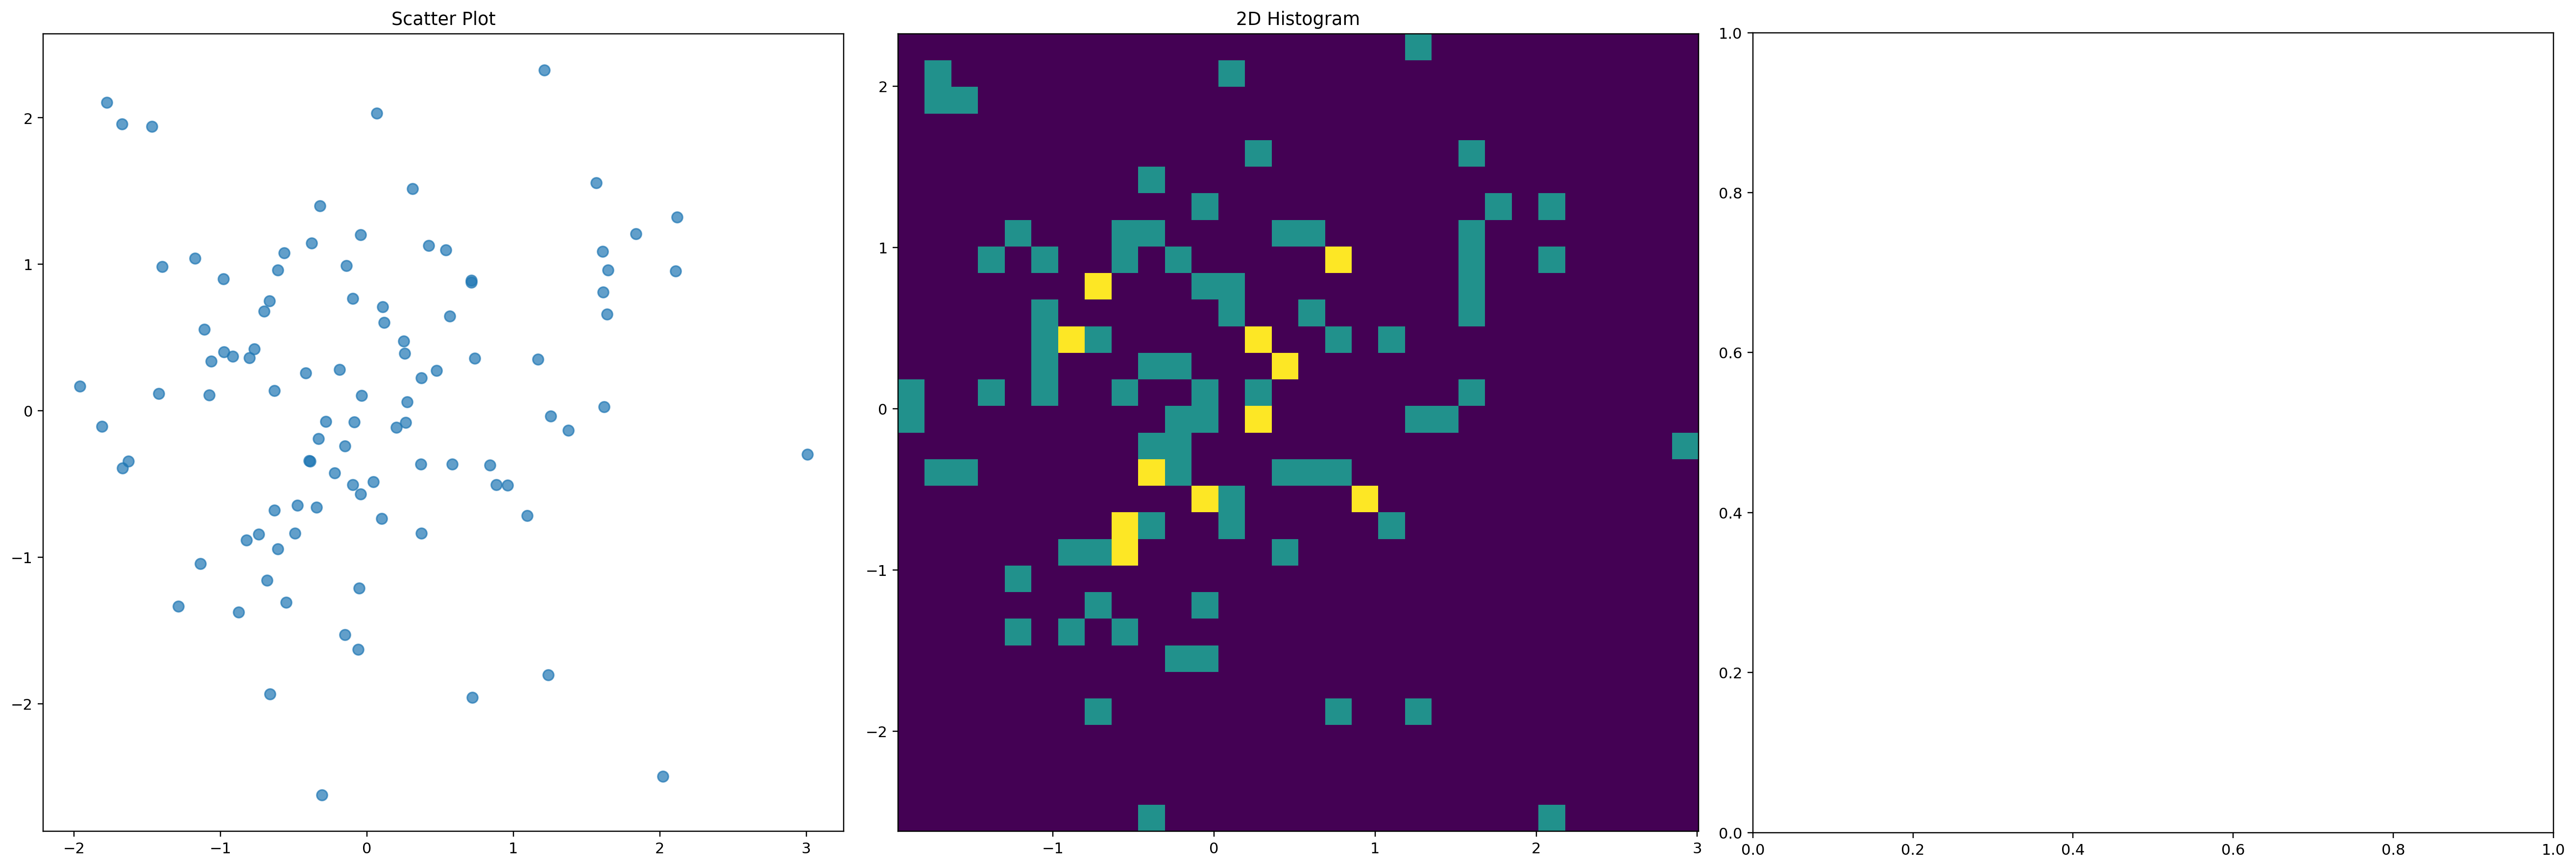

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = np.random.randn(100)
y = np.random.randn(100)

# Create the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(24,8), dpi=220)

# Scatter plot
axs[0].scatter(x, y, cmap='jet', s=50, alpha=0.7)
axs[0].set_title('Scatter Plot')
axs[0].set_aspect('equal')  # Set equal aspect ratio

# 2D histogram
axs[1].hist2d(x, y, bins=30)
axs[1].set_title('2D Histogram')
axs[1].set_aspect('equal')  # Set equal aspect ratio

plt.tight_layout()
plt.show()